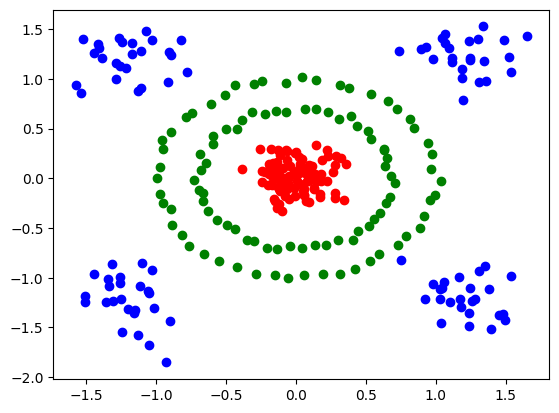

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles


def make_data(num):
    """
    构造数据
    :param num: 每类样本的数据量
    """
    np.random.seed(0)

    """
    红色数据使用 make_blobs 生成
    以 (0, 0) 为中心，标准差为 0.15 生成 num 个数据
    """
    red, _ = make_blobs(n_samples=num, n_features=2,
                        centers=[[0, 0]], cluster_std=0.15)

    """
    绿色数据使用 make_circles 生成, 分布在红色数据的周围
    """
    green, _ = make_circles(n_samples=num, noise=0.02, factor=0.7)

    """
    蓝色数据使用 make_blobs 生成, 分布在四周
    """
    blue, _ = make_blobs(n_samples=num, n_features=2,
                         centers=[
                             [-1.2, -1.2],
                             [-1.2, 1.2],
                             [1.2, -1.2],
                             [1.2, 1.2]
                         ], cluster_std=0.2)

    return red, green, blue


red, green, blue = make_data(100)
plt.scatter(red[:, 0], red[:, 1], c='r', marker='o')
plt.scatter(green[:, 0], green[:, 1], c='g', marker='o')
plt.scatter(blue[:, 0], blue[:, 1], c='b', marker='o')

In [35]:
import torch
import torch.nn as nn


class Network(nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super(Network, self).__init__()
        self.hidden = nn.Linear(n_in, n_hidden)
        self.out = nn.Linear(n_hidden, n_out)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        y = self.out(x)
        return y

    def predict(self, x):
        x = torch.relu(self.hidden(x))
        y = torch.sigmoid(self.out(x))
        return y


train_data = torch.FloatTensor(np.vstack([red, green, blue]))
label = torch.LongTensor([0] * len(green) + [1] * len(blue) + [2] * len(red))

model = Network(2, 5, 3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10000):
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('epoch: {}, loss: {}'.format(epoch, loss.item()))

epoch: 0, loss: 1.1274992227554321
epoch: 1000, loss: 0.04440445452928543
epoch: 2000, loss: 0.020014889538288116
epoch: 3000, loss: 0.011851338669657707
epoch: 4000, loss: 0.0076817721128463745
epoch: 5000, loss: 0.005170863121747971
epoch: 6000, loss: 0.003530119312927127
epoch: 7000, loss: 0.0024085708428174257
epoch: 8000, loss: 0.001626384793780744
epoch: 9000, loss: 0.0007407505763694644


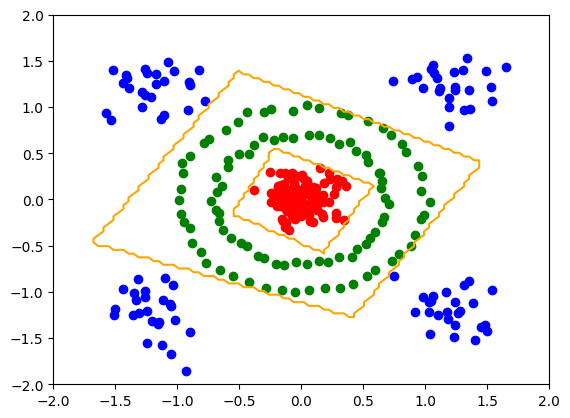

In [47]:
def draw_decision_boundary(x_min, x_max, y_min, y_max, model):
    x = np.linspace(x_min, x_max, 100)
    y = np.linspace(y_min, y_max, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.c_[X.ravel(), Y.ravel()]
    Z = torch.argmax(model(torch.FloatTensor(Z)), dim=1)
    Z = Z.reshape(X.shape)
    plt.contour(X, Y, Z, levels=[0, 1, 2], alpha=1, colors='orange')


plt.scatter(red[:, 0], red[:, 1], c='r', marker='o')
plt.scatter(green[:, 0], green[:, 1], c='g', marker='o')
plt.scatter(blue[:, 0], blue[:, 1], c='b', marker='o')
draw_decision_boundary(-2, 2, -2, 2, model)